In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
random_state = 42

dataset = make_blobs(n_samples=1100, n_features=10, centers=2, cluster_std=9, random_state=random_state)

In [4]:
x, y = dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

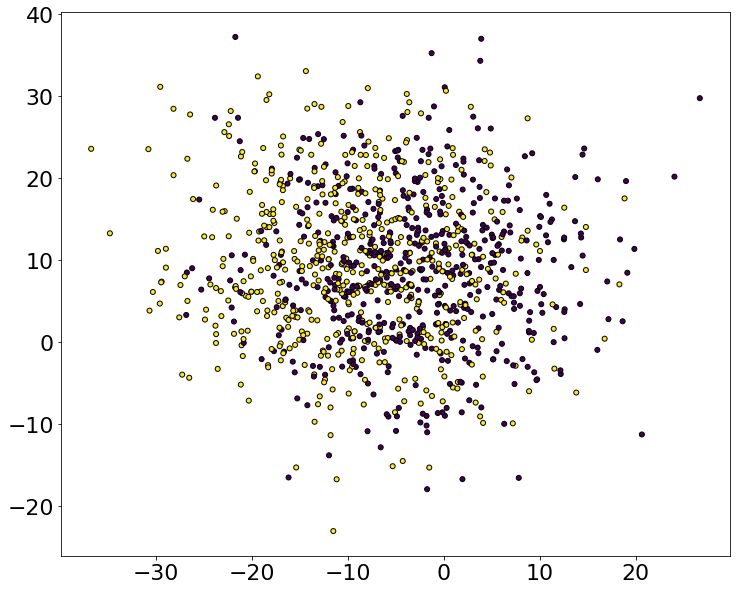

In [39]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [126]:
from classifier_tree import Classifier_Tree

In [127]:
%%time

tree = Classifier_Tree(5, 2, 'gini')
tree.fit(x_train, y_train)

probas = tree.predict_probas(x_test, y_test)

CPU times: user 3.63 s, sys: 0 ns, total: 3.63 s
Wall time: 3.63 s


In [120]:
tree.bin_tree.node

(9, 0.4197340688932633, 0.46987916023825527)

In [121]:
print roc_auc_score(y_test, probas[:, 1])
print accuracy_score(y_test, np.argmax(probas, axis=1))

0.7819113756613757
0.7272727272727273


In [122]:
auc_stump = roc_auc_score(y_test, probas[:, 1])
acc_stump = accuracy_score(y_test, np.argmax(probas, axis=1))

In [123]:
from adaboost import AdaBoostClassifier

In [124]:
%%time

algo = AdaBoostClassifier(max_depth=2)
algo.fit(x_train, y_train, 30)

probas = algo.predict_probas(x_test, y_test)

Training Tree number: 0
-------------------------------
0.30000000000000004
Training Tree number: 1
-------------------------------
0.2693602693602694
Training Tree number: 2
-------------------------------
0.33097843976300195
Training Tree number: 3
-------------------------------
0.39003836134029374
Training Tree number: 4
-------------------------------
0.39348170255441656
Training Tree number: 5
-------------------------------
0.354254784878489
Training Tree number: 6
-------------------------------
0.3591494576820847
Training Tree number: 7
-------------------------------
0.376487184518412
Training Tree number: 8
-------------------------------
0.42028326459285925
Training Tree number: 9
-------------------------------
0.4391418453868067
Training Tree number: 10
-------------------------------
0.43148004435846143
Training Tree number: 11
-------------------------------
0.4015281971085481
Training Tree number: 12
-------------------------------
0.40918648789124895
Training Tree num

In [125]:
print roc_auc_score(y_test, probas[:, 1])
print accuracy_score(y_test, np.argmax(probas, axis=1))

0.876984126984127
0.7818181818181819


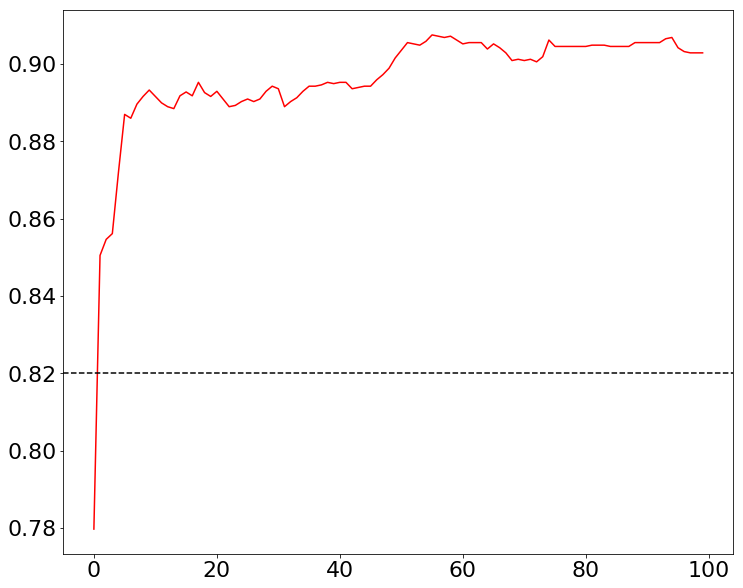

In [108]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.plot(range(len(algo.auc)), algo.auc, color='r')
plt.axhline(y=auc_stump, color='k', linestyle='--')

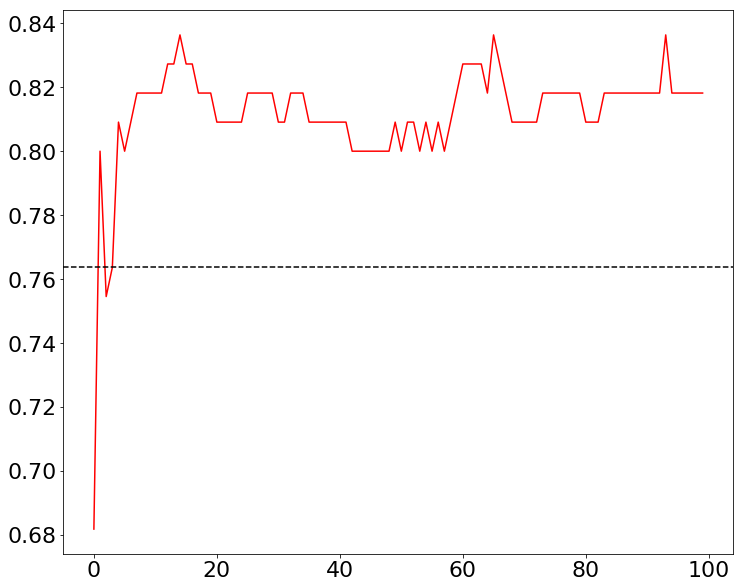

In [109]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.plot(range(len(algo.auc)), algo.acc, color='r')
plt.axhline(y=acc_stump, color='k', linestyle='--')

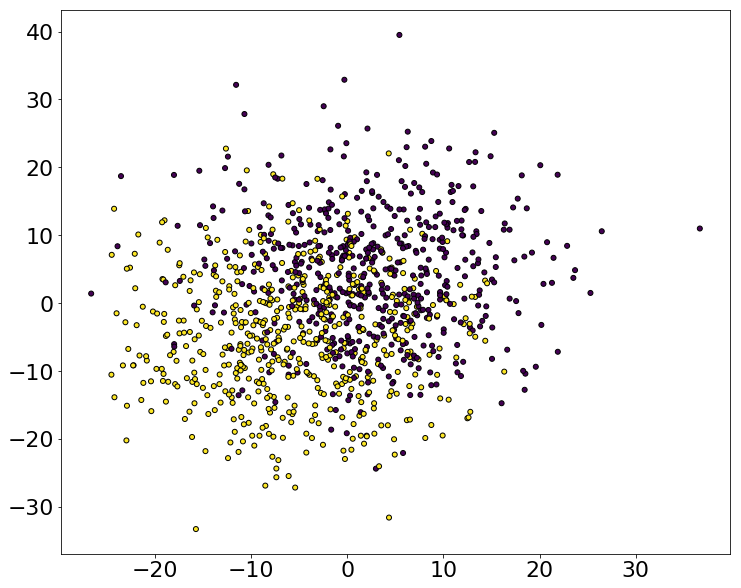

In [40]:
plt.scatter(x[:, 3], x[:, 9], marker='o', c=y,
            s=25, edgecolor='k')